# Challenge de Analítica: Data en Kaggle
Busca en : https://www.kaggle.com/datasets  
Selecciona una dataset que te guste y cargalo en tu Colab!
Tu dataset debe contar con:
- Columna de fecha
- Variables cuantitativas (contínuas) 
- Variables cualitativas (nominales u ordinales)

**Equipo Minimax:** 
- Yusdivia Molina Román
- Diego Enrique Jiménez Urgell


# Librerías
Agrega las librerías que necesitas:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
import numpy as np
import time

from google.colab import drive
drive.mount('/content/drive')

games = pd.read_csv("/content/drive/MyDrive/semanaTecAnalitica/games.csv")
games.head(n=5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


El dataset tiene la fecha en formato Epoch, por lo que se aplica una función lambda, que convierte un integer a Date en formato %Y-%m-%d, a cada entry de las columnas *created at* y *last_move_at*.

In [ ]:
# Función lambda a aplicar en cada entry de las columnas con fecha Epoch
func= lambda x: time.strftime('%Y-%m-%d',time.localtime(x/1000))

# Agregar columnas con las fechas transformadas a Date
games['CreatedDate']= games.created_at.apply(func)
games['FinishDate']= games.last_move_at.apply(func)
games.head(n=5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,CreatedDate,FinishDate
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31,2017-08-31
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,2017-08-30,2017-08-30
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,2017-08-30,2017-08-30
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,2017-08-30,2017-08-30
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,2017-08-29,2017-08-29


# Estructura del dataset
Visualiza la estructura del data set: 


*   Número de renglones



In [ ]:
len(games)


20058

*   Número de columnas


In [ ]:
len(games.columns)


18

*   Tipos de datos de todas las variables

In [ ]:
games.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
CreatedDate        object
FinishDate         object
dtype: object

# Estadística Descriptiva
Obtén la tabla resumen de todas las variables.
Muestra, de dos columnas:
* media
* mediana
* min
* max
* std

In [ ]:
games.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
print(games["turns"].mean())
print(games["turns"].median())
print(games["turns"].min())
print(games["turns"].max())
print(games["turns"].std())



60.46599860404826
55.0
1
349
33.570584753537055


In [ ]:
print(games["black_rating"].mean())
print(games["black_rating"].median())
print(games["black_rating"].min())
print(games["black_rating"].max())
print(games["black_rating"].std())



1588.8319872370128
1562.0
789
2723
291.03612596033696


# Agrupamientos
Selecciona y crea dos agrupamientos de dos columnas.


In [ ]:
gVicStatus=games.groupby('victory_status')['turns'].mean()
gVicStatus


victory_status
draw         83.781457
mate         65.415020
outoftime    72.742857
resign       53.912533
Name: turns, dtype: float64

In [ ]:
whitesId=games.groupby('white_id')['white_rating'].mean()
whites=pd.DataFrame(whitesId)
whites =pd.DataFrame(whites.white_rating.sort_values(ascending=False))
whites.head(n=3)


,white_rating
white_id,
justicebot,2700.000000
blitzbullet,2622.000000
lance5500,2616.034483


# Gráficas
Crea las siguientes gráficas:
* Boxplot de una variable y agrega su interpretación.
* Bloxplot de todas las variables de un agrupamiento y agrega su interpretación.
* Barplot de una variable agrupada y agrega su interpretación.
* Dos gráficas de tiempo: una usando la columna de date y otra con sólo el año (y agrega su interpretación)

### Número de turnos en un juego

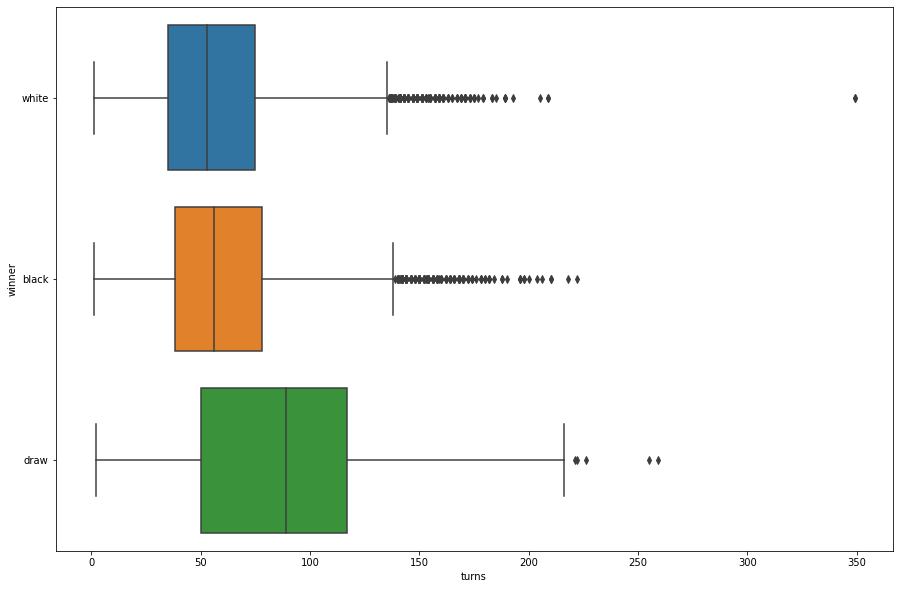

In [ ]:
plt.figure(figsize=(15,10))
sas.boxplot(x="turns", y="winner", data=games)

Aquí podemos observar el número de turnos que se toma para determinar un ganador o declarar un empate. Vemos que por lo regular se toman menos turnos para que ganen las fichas blancas a las negras. Esto se debe a que, las blancas poseen una ventaja al iniciar el juego. Por otro lado, observamos que se toman muchos más turnos para declarar un empate, esto sucede pues la mayoría de las veces se termina el tiempo. 


### Relación entre opening y rating de los jugadores

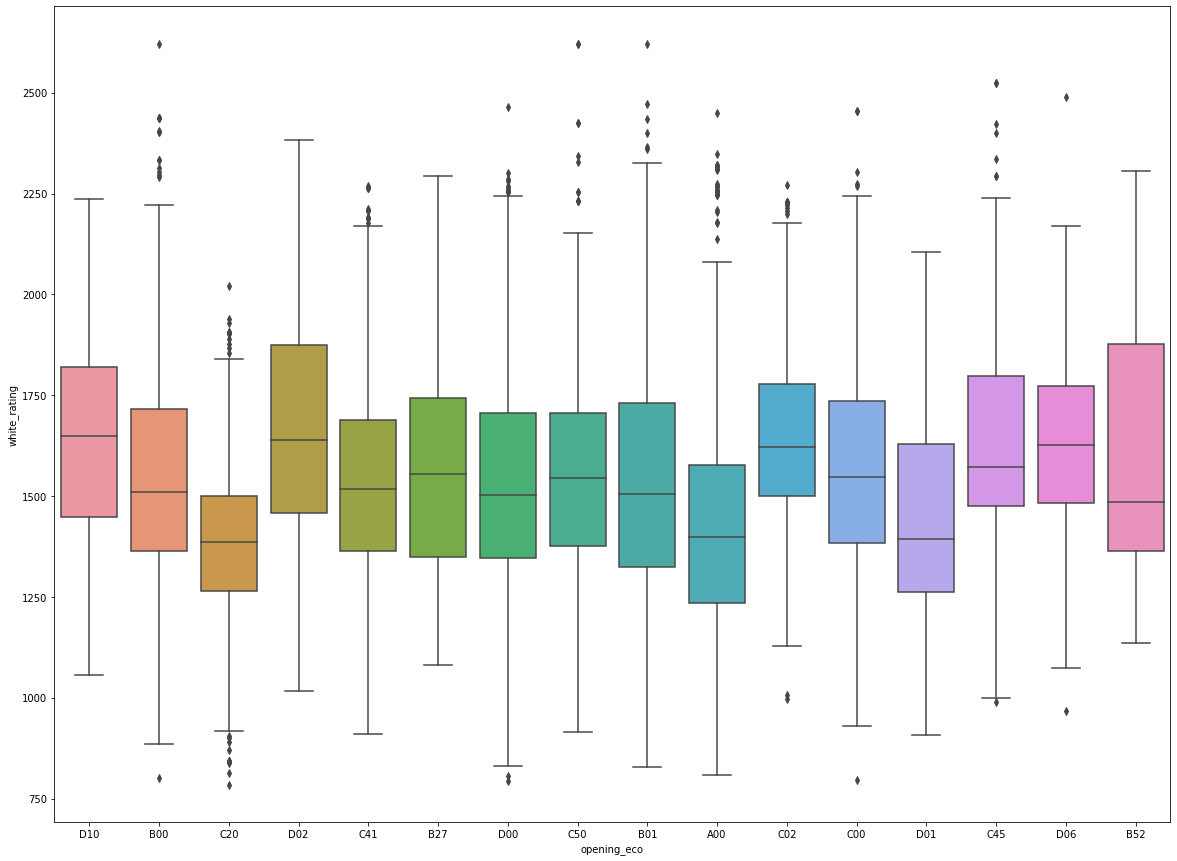

In [ ]:
pp =games[games.opening_eco.isin(['D10', 'B00', 'C20', 'D02', 'C41', 'B27', 'D00', 'C50', 'B01','A00', 'C02', 'C00','D01', 'C45', 'D06', 'B52'])]
plt.figure(figsize=(20,15))
sas.boxplot(x="opening_eco",y= "white_rating", data=pp, orient="v")


Aquí podemos ver la relación entre el código para cada apertura y el puntaje final del jugador con piezas blancas. Podemos ver que no hay una relación directa entre el tipo de apertura que se elige y el puntaje final, por lo cual el que gane un jugador u otro no depende directamente en el tipo de apertura que se elige. 


### Openings más efectivos

Text(0.5, 0, 'Ratio of white over black winner')

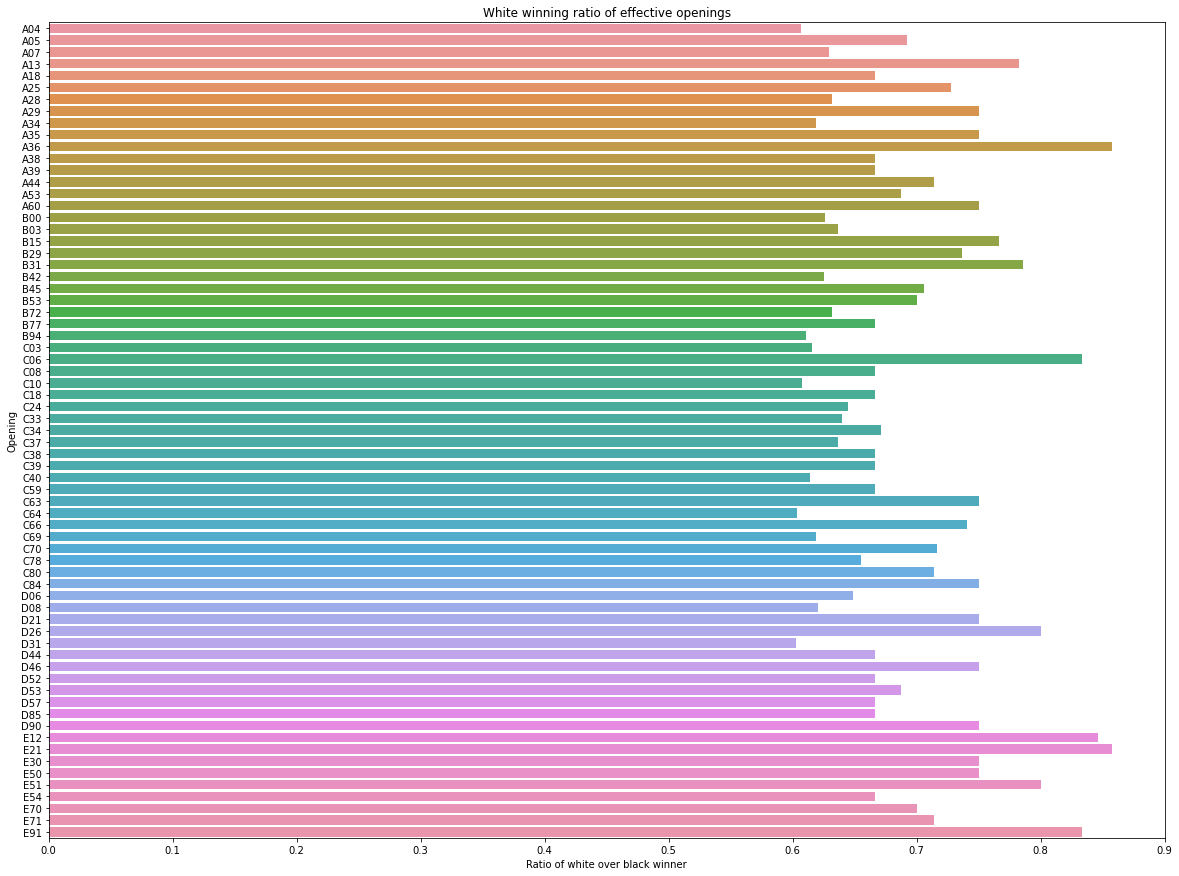

In [ ]:
# Separar los datos dependiendo de quien ganó, posteriormente separar por opening
# y contar cuantos jugadores usaron cada opening diferente
white=games[games.winner=="white"].opening_eco.value_counts()
black=games[games.winner=="black"].opening_eco.value_counts()

# Obtener la proporción de jugadores blancos que ganan con cada opening
ratio_opening = pd.DataFrame(white/(white+black))

# Seleccionar solamente las openings cuyo ratio de victoria para los blancos sea 
# mayor al 60%
effective_opening=ratio_opening[ratio_opening.opening_eco > 0.6]

# Graficar
plt.figure(figsize=(20,15))
ax= sas.barplot(y=effective_opening.index, x=effective_opening.opening_eco, orient="h")

ax.set_title('White winning ratio of effective openings')
ax.set_ylabel('Opening')
ax.set_xlabel('Ratio of white over black winner')



Esta gráfica muestra el ratio de victorias blancas sobre partidas totales para diferentes openings. Debido a que el dataset tenía más de 360 openings, se seleccionaron únicamente las que tienen un ratio mayor al 60%. Esto significa que si un jugador de piezas blancas escoge empezar con alguna de estas openings, su probabilidad de ganar la partida sería mínimo de 60%. Algunas, como la E21, indican una probabilidad de victoria de más del 80%. Esta gráfica puede servir como una guía que ayude a los jugadores a determinar la mejor opening en sus partidas. 

### Distribución de partidas por mes

Text(0, 0.5, 'Games')

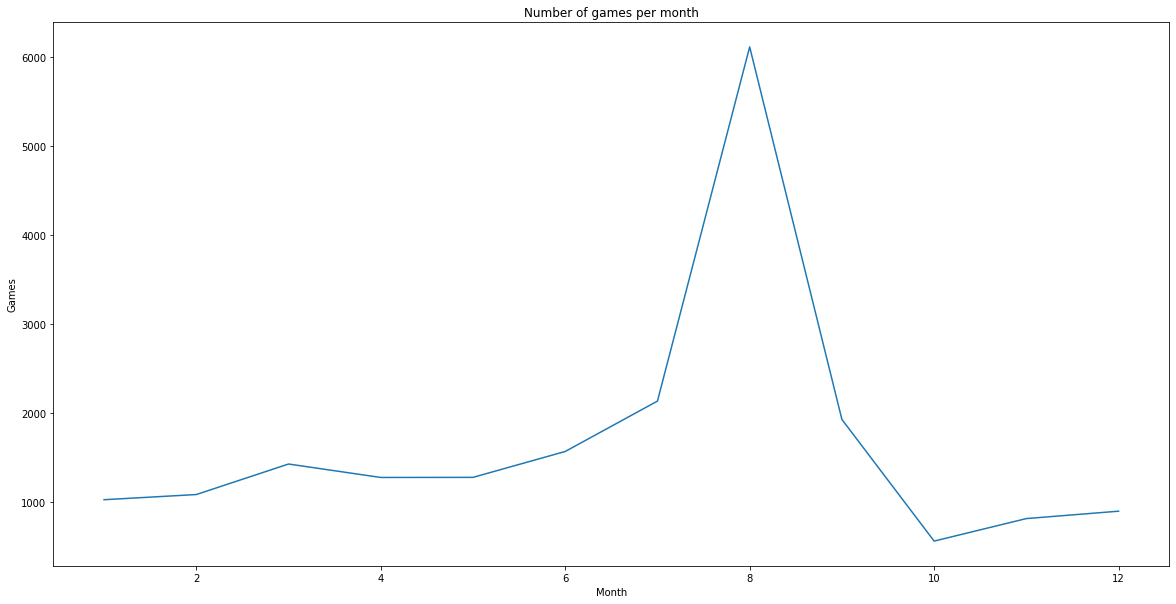

In [ ]:
games['Month'] = pd.DatetimeIndex(games['CreatedDate']).month

games_per_month = pd.DataFrame(games["Month"].value_counts())
games_per_month.sort_index()
plt.figure(figsize=(20,10))
ax=sas.lineplot(x=games_per_month.index, y=games_per_month.Month)
ax.set_title('Number of games per month')
ax.set_xlabel('Month')
ax.set_ylabel('Games')

Esta gráfica muestra la distribución de partidas a lo largo del año. Es evidente que en Agosto aumenta drásticamente el número de partidas, y en el resto del año disminuyen. Esto probablemente se debe a que en el mes de Agosto hay algún torneo que incentiva a las personas a jugar más. 

### Distribución de partidas por año

Text(0, 0.5, 'Games')

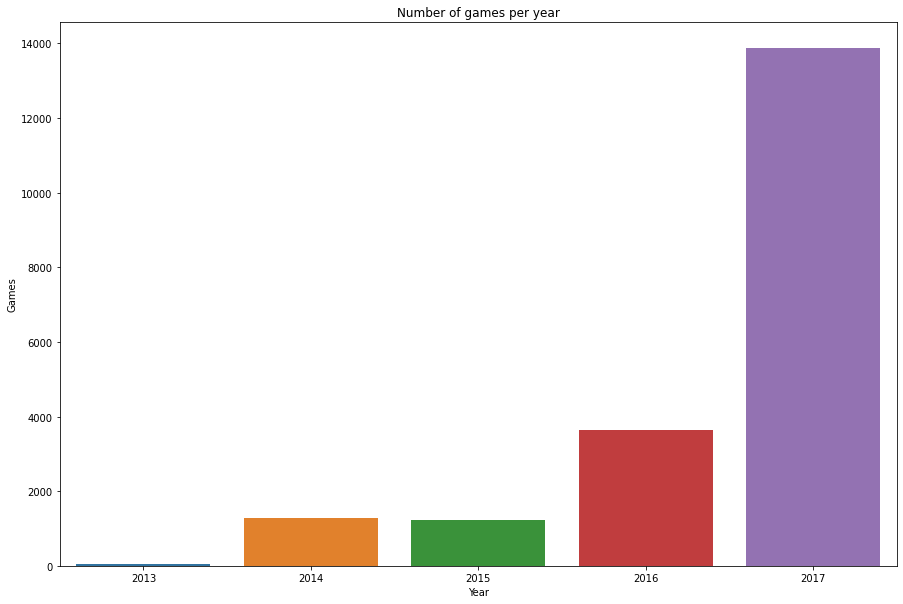

In [ ]:
games["Year"] = pd.DatetimeIndex(games['CreatedDate']).year
games_per_year = pd.DataFrame(games["Year"].value_counts())

plt.figure(figsize=(15,10))
ax= sas.barplot(x=games_per_year.index, y=games_per_year.Year)
ax.set_title('Number of games per year')
ax.set_xlabel('Year')
ax.set_ylabel('Games')

La gráfica muestra la distribución de las partidas a lo largo de un lustro. Se puede observar que en 2013 había muy pocas partidas, y poco a poco fueron aumentando. Para 2017, el número de partidas prácticamente se triplicó con respecto a 2016. Esto indica que el ajedrez se ha popularizado a lo largo de los años. 